<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import torch
import torch.utils.data as tchdata
from sklearn import preprocessing
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox

## F1 : Plots

In [ ]:
def plots(first, y_label, title, num_iterations , x_label='iterations',second=None, third=None, show_min=True):
    
    fig = plt.figure()
    fig.gca().set_position((.15, .3, .80, .6))
    
    plt.ylabel(y_label+"->")
    
#     (activation, layers_dims, num_iterations, learning_rate, lambd) = info
#     s1="lambda="+str(lambd)
#     s2="layers_dimensions="+str(layers_dims)
#     s3="num_iterations="+str(num_iterations)
#     s4="learning_rate="+str(learning_rate)
#     s5="activation="+str(activation)
    
    t =np.linspace(0, num_iterations-1, num=num_iterations)
    plt.figtext(.5,.92,title, fontsize=14, ha='center', fontweight='bold')        
#     plt.figtext(0.5,.136,s1+"\n"+s4+"\n"+s3+"\n"+s2,fontsize=10,ha='left', va='center',  bbox={'facecolor':'grey', 'alpha':0.3, 'pad':4})
    plt.figtext(0.25, .33, x_label+'->', fontsize=10,ha='left', va='center')  
#     plt.figtext(0.45,.85,s5,fontsize=10,ha='left', va='center',color='#B22222', bbox={'facecolor':'wheat', 'alpha':0.3, 'pad':5})     
    
    
    first_list, first_list_name=first
    first_array = np.array(first_list)
    (first_max_x, first_max_y)=(round((np.argmax(first_array)),3), round(np.amax(first_array), 3))

    #(global_max_x, global_max_y, global_max_name)=(t[first_max_x], first_max_y, first_list_name)
    if (second is not None):
        second_list, second_list_name=second
        second_array = np.array(second_list)
        (second_max_x, second_max_y)=(round((np.argmax(second_array)),3), round(np.amax(second_array), 3))
        #(global_max_x, global_max_y, global_max_name)=(global_max_x, global_max_y, global_max_name) if (global_max_y<second_max_y) else  (t[second_max_x], second_max_y,second_list_name)

    
    if not(third is None):
        third_list, third_list_name=third
        third_array=np.array(third_list)
        (third_max_x, third_max_y)=(round((np.argmax(third_array)),3), round(np.amax(third_array), 3))
        #(global_max_x, global_max_y, global_max_name)=(t[third_max_x], third_max_y, third_list_name) if (third_max_y<global_max_y) else  (global_max_x, global_max_y, global_max_name)
    

    if(show_min):
        plt.scatter(first_max_x,first_max_y,c='b',label='max_'+first_list_name+'('+str(first_max_x)+','+str(first_max_y)+')')
        if ((third is None) and (not(second is None))):
            plt.scatter(second_max_x,second_max_y,c='r',label='max_'+second_list_name+'('+str(second_max_x)+','+str(second_max_y)+')')

        elif (not(third is None) and not(second is None)):

            plt.scatter(second_max_x,second_max_y,c='r',label='max_'+second_list_name+'('+str(second_max_x)+','+str(second_max_y)+')')
            plt.scatter(third_max_x,third_max_y,c='g',label='max_'+third_list_name+'('+str(third_max_x)+','+str(third_max_y)+')')

        #print('For '+str(num_iterations)+' iterations, maximum value ['+str(global_max_y) + '] of the graph for "'+str(title)+'" was obtained at '+ str(global_max_x)+'th iteration, corresponding to "'+str(global_max_name)+'" plot.')

    plot1,=plt.plot(t, np.squeeze(first_list), 'b-', linewidth=1.5, label=first_list_name)
    plt.legend(bbox_to_anchor=(0.4, -0.15))
    if (not(second is None)):
            plot2,=plt.plot(t, np.squeeze(second_list), 'r-', linewidth=1.5, label=second_list_name)
            plt.legend(bbox_to_anchor=(0.4, 0))
            if(not(third is None)):
                plot3,=plt.plot(t, np.squeeze(third_list), 'g-', linewidth=1.5, label=third_list_name)
                plt.legend(bbox_to_anchor=(0.4, 0.15))
    
    
    plt.savefig('../content/drive/MyDrive/Colab Notebooks/DataTEP/plots/['+str(datetime.now()).replace(":", "")+'] '+title+".png")
    plt.show()
    return (0,0,0)

## F2/F3/F4 : Confusion Matrix 1/2/3

In [ ]:
def confusion_table1(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x=[1, 2, 6, 7, 8]
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,5)
    minor_ticks = [x + 0.5 for x in range(0, 5)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('../content/drive/MyDrive/Colab Notebooks/DataTEP/plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

In [ ]:
def confusion_table2(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x = [3, 4, 5, 9, 10, 11, 12]
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,7)
    minor_ticks = [x + 0.5 for x in range(0, 7)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('../content/drive/MyDrive/Colab Notebooks/DataTEP/plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

In [ ]:
def confusion_table3(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x = list(range(1, 22))
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,21)
    minor_ticks = [x + 0.5 for x in range(0, 21)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('../content/drive/MyDrive/Colab Notebooks/DataTEP/plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

## C1 : Accuracy Metric

In [ ]:
class AccMectric(object):
    def __init__(self):
        self.reset()
        
    def reset(self):
        self._sum = 0
        self._count = 0
    
    def update(self, targets, outputs):
        pred = outputs.argmax(axis=1)
        self._sum += (pred == targets).sum()
        self._count += targets.shape[0]
        
    def get(self):
        return self._sum / self._count

## F5: Reading data from file

In [ ]:
def read_data(error=0, is_train=True):
    fi = os.path.join('../content/drive/MyDrive/Colab Notebooks/DataTEP/', 
        ('d0' if error < 10 else 'd') + str(error) + ('_te.dat' if is_train else '.dat'))
    with open(fi, 'r') as fr:
        data = fr.read()
    data = np.fromstring(data, dtype=np.float32, sep='   ')
    if fi == 'data/d00.dat':
        data = data.reshape(-1, 500).T
    else:
        data = data.reshape(-1, 52)
    if is_train:
        data = data[160: ]
    return data, np.ones(data.shape[0], np.int64) * error

## F6: Reading and Converting data into sequence

In [ ]:
def gen_seq_data(target, n_samples, is_train):
    seq_data, seq_labels = [], []
    for i, t in enumerate(target):
        d, _ = read_data(t, is_train)
        data = []
        length = d.shape[0] - n_samples + 1
        for j in range(n_samples):
            data.append(d[j : j + length])
        data = np.hstack(data)
        seq_data.append(data)
        seq_labels.append(np.ones(data.shape[0], np.int64) * i)
    return np.vstack(seq_data), np.concatenate(seq_labels)

## F7: Training a model using training data and an optimizer function

In [ ]:
def train(model, optimizer, train_loader):
    model.train()
    acc = AccMectric()
    for data, labels in train_loader:
        x = torch.autograd.Variable(data.cuda())
        y = torch.autograd.Variable(labels.cuda())
        o = model(x)
        
        loss = torch.nn.NLLLoss()(torch.nn.LogSoftmax()(o), y)
        acc.update(labels.numpy(), o.data.cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return acc.get()

## F8: Testing a model using test data

In [ ]:
def validate(model, test_loader):
    model.eval()
    acc = AccMectric()
    pred = []
    targets = []
    for data, labels in test_loader:
        x = torch.autograd.Variable(data.cuda())
        o = model(x)
        outputs = o.data.cpu().numpy()
        acc.update(labels.numpy(), outputs)
        pred.extend(outputs.argmax(axis=1))
        targets.extend(labels.numpy())
    return (acc.get(), np.asarray(pred), np.asarray(targets))

## F9 : Principal Component Analysis and SVM for classification of faults

In [ ]:
def PCA_TE(n_components, train_data, train_labels, test_data, test_labels):
    mat = PCA(n_components).fit(train_data)

    train_data = mat.transform(train_data)
    test_data = mat.transform(test_data)

    clf = svm.SVC(probability=True).fit(train_data, train_labels)
    pred_pca = clf.predict(test_data)
    print('accuracy: {:0.3f}'.format(np.mean(test_labels == pred_pca)))
    
    return pred_pca

## F10 : Linear Discriminant Analysis and SVM for classification of faults

In [ ]:
def LDA_TE(n_components, train_data, train_labels, test_data, test_labels):    
    d = LDA(n_components=30).fit(train_data, train_labels)

    train_data = d.transform(train_data)
    test_data = d.transform(test_data)

    clf = svm.SVC(probability=True).fit(train_data, train_labels)
    pred = clf.predict(test_data)
    print('accuracy: {:0.3f}'.format(np.mean(test_labels == pred)))

    return pred

## C2 : Artificial Neural Network initialization

In [ ]:
class ANN(torch.nn.Module):
    def __init__(self, i, h, o ):
        super(ANN, self).__init__()
        self.h1 = torch.nn.Linear(i, h)
        self.b1 = torch.nn.BatchNorm1d(h)
        self.a1 = torch.nn.LeakyReLU(0.01, True)
        self.h2 = torch.nn.Linear(h, h)
        self.b2 = torch.nn.BatchNorm1d(h)
        self.a2 = torch.nn.LeakyReLU(0.01, True)
        self.sm = torch.nn.Linear(h, o)
        
    def forward(self, x):
        x = self.a1(self.b1(self.h1(x)))
        x = self.a2(self.b2(self.h2(x)))
        x = self.sm(x)
        return x

## F11 : Artificial Neural Network for classification of faults

In [ ]:
def ANN_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)

    model = ANN(52 * n_samples, n_hidden, len(target))
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_ANN=[]
    test_acc_ANN=[]
    pred = []
    targets = []
    vtrain = []
    vtest = []
    
    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_ANN.append(train_acc)
        test_acc_ANN.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
         
    return (train_acc_ANN, test_acc_ANN, targets, pred)

In [ ]:
class LSTM(torch.nn.Module):
    def __init__(self, i, h, o, n_samples, is_bn=False):
        super(LSTM, self).__init__()
        self._lstm_cell = torch.nn.LSTMCell(i, h)
        self._fc = torch.nn.Linear(h, o)
        self._hidden = h
        self._n_samples = n_samples
        self._is_bn = is_bn
        if self._is_bn:
            self._bn = torch.nn.BatchNorm1d(h)
        
    def forward(self, x):
        seq_data = x.chunk(self._n_samples, dim=1)
        h_t = torch.autograd.Variable(torch.zeros(x.size(0), self._hidden).cuda())
        c_t = torch.autograd.Variable(torch.zeros(x.size(0), self._hidden).cuda())
        for data in seq_data:
            h_t, c_t = self._lstm_cell(data, (h_t, c_t))
        if self._is_bn:
            h_t = self._bn(h_t)
        fc = self._fc(h_t)
        return fc

## F12 : Long/Short Term Memory for classification of faults with't Batch Norm

In [ ]:
def LSTM_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    model = LSTM(52, n_hidden, len(target), n_samples, False)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_LSTM=[]
    test_acc_LSTM=[]
    pred = []
    targets = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_LSTM.append(train_acc)
        test_acc_LSTM.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
     
    return (train_acc_LSTM, test_acc_LSTM, targets, pred)

## F13 : Long/Short Term Memory for classification of faults with Batch Norm

In [ ]:
def LSTMB_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    model = LSTM(52, n_hidden, len(target), n_samples, True)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_LSTM=[]
    test_acc_LSTM=[]
    pred = []
    targets = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_LSTM.append(train_acc)
        test_acc_LSTM.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
        
    return (train_acc_LSTM, test_acc_LSTM, targets, pred)

## C4 : Convulutional Neural Network initialization

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self, i, h, o, n):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv1d(1, 8, kernel_size=8),
            torch.nn.BatchNorm1d(8),
            torch.nn.ReLU(),
            torch.nn.Dropout(.2),
            torch.nn.MaxPool1d(2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv1d(8, 16, kernel_size=4),
            torch.nn.BatchNorm1d(16),           
            torch.nn.ReLU(),
            torch.nn.Dropout(.2),
            torch.nn.MaxPool1d(2))
        self.fc = torch.nn.Linear(16*35, h)
        self.b2 = torch.nn.BatchNorm1d(h)
        self.a2 = torch.nn.LeakyReLU(0.01, True)
        self.sm = torch.nn.Linear(h, o)
        
    def forward(self, x):
        #print(x.shape)
        x = self.layer1(x)
        #print(out.shape)
        x = self.layer2(x)
        #print(out.shape)
        x = x.view(-1, 16*35)
        x = self.a2(self.b2(self.fc(x)))
        x = self.sm(x)
        #print(out.shape)
        return x

In [ ]:
def CNN_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    
    # expand the train and valid data to fit the expected Tensor

    train_data = np.expand_dims(train_data, axis=1)
    print(train_data.shape)
    test_data = np.expand_dims(test_data, axis=1)
    print(test_data.shape)
    
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    model = CNN(52 * n_samples, n_hidden, len(target), n_samples)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_CNN=[]
    test_acc_CNN=[]
    pred = []
    targets = []
    mt = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader) 
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_CNN.append(train_acc)
        test_acc_CNN.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
        
    return (train_acc_CNN, test_acc_CNN, targets, pred)

# Fault Set 1: Using 1st, 2nd, 6th, 7th and 8th fault in the process

In [ ]:
n_samples = 3      
n_hidden = 30
n_components=30
target1 = [1, 2, 6, 7, 8]

In [ ]:
train_data1, train_labels1 = gen_seq_data(target1, n_samples, is_train=True)
test_data1, test_labels1 = gen_seq_data(target1, n_samples, is_train=False)

scaler1 = preprocessing.StandardScaler().fit(train_data1)
train_data1 = scaler1.transform(train_data1)
test_data1 = scaler1.transform(test_data1)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(156, 5 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


accuracy: 0.974


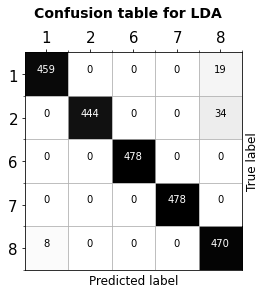

In [ ]:
lda1 = LDA_TE(n_components, train_data1, train_labels1, test_data1, test_labels1)
confusion_table1(test_labels1, lda1, 'Confusion table for LDA')

accuracy: 0.903


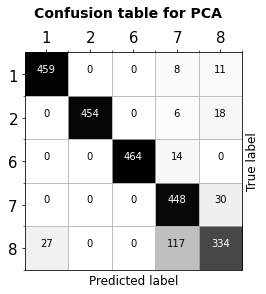

In [ ]:
pca1 = PCA_TE(n_components, train_data1, train_labels1, test_data1, test_labels1)
confusion_table1(test_labels1, pca1, 'Confusion table for PCA')

In [ ]:
ann1 = ANN_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:23:04.464780	epoch = 0	train accuracy: 0.930	test accuracy: 0.964
2021-06-14 01:23:04.817452	epoch = 1	train accuracy: 0.974	test accuracy: 0.976
2021-06-14 01:23:05.184037	epoch = 2	train accuracy: 0.980	test accuracy: 0.949
2021-06-14 01:23:05.545707	epoch = 3	train accuracy: 0.981	test accuracy: 0.967
2021-06-14 01:23:05.910735	epoch = 4	train accuracy: 0.978	test accuracy: 0.983
2021-06-14 01:23:06.276218	epoch = 5	train accuracy: 0.980	test accuracy: 0.979
2021-06-14 01:23:06.648500	epoch = 6	train accuracy: 0.980	test accuracy: 0.957
2021-06-14 01:23:07.011997	epoch = 7	train accuracy: 0.980	test accuracy: 0.954
2021-06-14 01:23:07.376702	epoch = 8	train accuracy: 0.983	test accuracy: 0.978
2021-06-14 01:23:07.734964	epoch = 9	train accuracy: 0.980	test accuracy: 0.972
2021-06-14 01:23:08.095454	epoch = 10	train accuracy: 0.979	test accuracy: 0.977
2021-06-14 01:23:08.446419	epoch = 11	train accuracy: 0.982	test accuracy: 0.968
2021-06-14 01:23:08.809081	epoch = 12	

In [ ]:
lstm1 = LSTM_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:23:26.099803	epoch = 0	train accuracy: 0.931	test accuracy: 0.977
2021-06-14 01:23:26.436206	epoch = 1	train accuracy: 0.986	test accuracy: 0.973
2021-06-14 01:23:26.777450	epoch = 2	train accuracy: 0.989	test accuracy: 0.974
2021-06-14 01:23:27.107621	epoch = 3	train accuracy: 0.988	test accuracy: 0.957
2021-06-14 01:23:27.452202	epoch = 4	train accuracy: 0.987	test accuracy: 0.962
2021-06-14 01:23:27.794441	epoch = 5	train accuracy: 0.990	test accuracy: 0.968
2021-06-14 01:23:28.134901	epoch = 6	train accuracy: 0.989	test accuracy: 0.974
2021-06-14 01:23:28.469925	epoch = 7	train accuracy: 0.984	test accuracy: 0.972
2021-06-14 01:23:28.801092	epoch = 8	train accuracy: 0.989	test accuracy: 0.969
2021-06-14 01:23:29.140023	epoch = 9	train accuracy: 0.990	test accuracy: 0.972
2021-06-14 01:23:29.476556	epoch = 10	train accuracy: 0.991	test accuracy: 0.974
2021-06-14 01:23:29.812491	epoch = 11	train accuracy: 0.987	test accuracy: 0.971
2021-06-14 01:23:30.151417	epoch = 12	

In [ ]:
lstmb1 = LSTMB_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:23:46.486253	epoch = 0	train accuracy: 0.949	test accuracy: 0.973
2021-06-14 01:23:46.863360	epoch = 1	train accuracy: 0.986	test accuracy: 0.933
2021-06-14 01:23:47.251579	epoch = 2	train accuracy: 0.980	test accuracy: 0.972
2021-06-14 01:23:47.623127	epoch = 3	train accuracy: 0.988	test accuracy: 0.972
2021-06-14 01:23:48.015364	epoch = 4	train accuracy: 0.989	test accuracy: 0.971
2021-06-14 01:23:48.410491	epoch = 5	train accuracy: 0.987	test accuracy: 0.958
2021-06-14 01:23:48.805708	epoch = 6	train accuracy: 0.986	test accuracy: 0.964
2021-06-14 01:23:49.227183	epoch = 7	train accuracy: 0.990	test accuracy: 0.977
2021-06-14 01:23:49.640422	epoch = 8	train accuracy: 0.985	test accuracy: 0.962
2021-06-14 01:23:50.041032	epoch = 9	train accuracy: 0.992	test accuracy: 0.971
2021-06-14 01:23:50.436170	epoch = 10	train accuracy: 0.990	test accuracy: 0.949
2021-06-14 01:23:50.820852	epoch = 11	train accuracy: 0.986	test accuracy: 0.977
2021-06-14 01:23:51.190460	epoch = 12	

In [ ]:
cnn1 = CNN_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

(3990, 1, 156)
(2390, 1, 156)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:24:09.742175	epoch = 0	train accuracy: 0.919	test accuracy: 0.901
2021-06-14 01:24:10.279048	epoch = 1	train accuracy: 0.966	test accuracy: 0.958
2021-06-14 01:24:10.822837	epoch = 2	train accuracy: 0.968	test accuracy: 0.920
2021-06-14 01:24:11.350453	epoch = 3	train accuracy: 0.967	test accuracy: 0.959
2021-06-14 01:24:11.891683	epoch = 4	train accuracy: 0.967	test accuracy: 0.956
2021-06-14 01:24:12.435852	epoch = 5	train accuracy: 0.971	test accuracy: 0.942
2021-06-14 01:24:12.958776	epoch = 6	train accuracy: 0.968	test accuracy: 0.959
2021-06-14 01:24:13.491497	epoch = 7	train accuracy: 0.967	test accuracy: 0.946
2021-06-14 01:24:14.046197	epoch = 8	train accuracy: 0.971	test accuracy: 0.961
2021-06-14 01:24:14.565580	epoch = 9	train accuracy: 0.974	test accuracy: 0.946
2021-06-14 01:24:15.103706	epoch = 10	train accuracy: 0.975	test accuracy: 0.961
2021-06-14 01:24:15.637585	epoch = 11	train accuracy: 0.974	test accuracy: 0.957
2021-06-14 01:24:16.177286	epoch = 12	

Média de treino:  0.9784335839599
Média de teste:  0.9698047419804741
Desvio padrão de treino:  0.0069341664885646795
Desvio padrão de teste:  0.008964515839058065


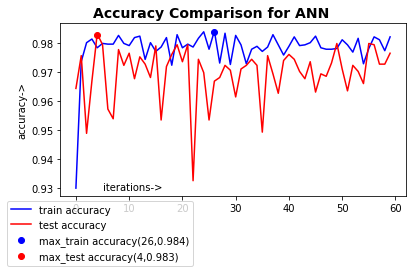

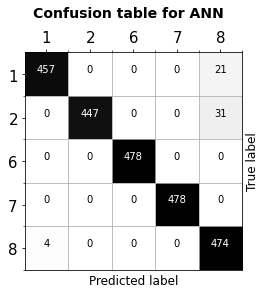

In [ ]:
train_acc1, test_acc1, targets1, pred1 = ann1
print("Média de treino: ",np.mean(train_acc1))
print("Média de teste: ",np.mean(test_acc1))
print("Desvio padrão de treino: ",np.std(train_acc1))
print("Desvio padrão de teste: ",np.std(test_acc1))
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for ANN',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for ANN')

Média de treino:  0.9880659983291561
Média de teste:  0.9698744769874476
Desvio padrão de treino:  0.007588798566791999
Desvio padrão de teste:  0.005546103624980593


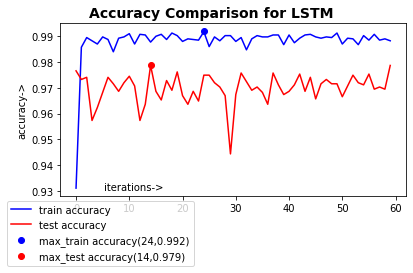

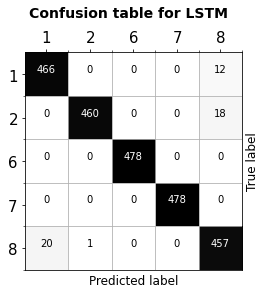

In [ ]:
train_acc1, test_acc1, targets1, pred1 = lstm1
print("Média de treino: ",np.mean(train_acc1))
print("Média de teste: ",np.mean(test_acc1))
print("Desvio padrão de treino: ",np.std(train_acc1))
print("Desvio padrão de teste: ",np.std(test_acc1))
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for LSTM')

Média de treino:  0.9888471177944863
Média de teste:  0.9703486750348674
Desvio padrão de treino:  0.005953897709405001
Desvio padrão de teste:  0.008665724396069907


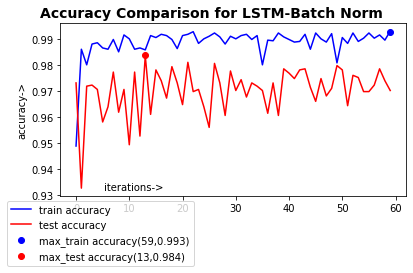

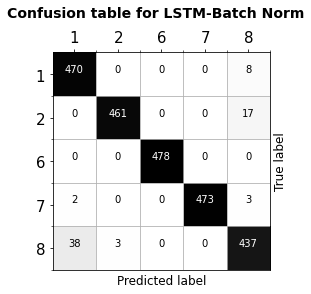

In [ ]:
train_acc1, test_acc1, targets1, pred1 = lstmb1
print("Média de treino: ",np.mean(train_acc1))
print("Média de teste: ",np.mean(test_acc1))
print("Desvio padrão de treino: ",np.std(train_acc1))
print("Desvio padrão de teste: ",np.std(test_acc1))
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM-Batch Norm',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for LSTM-Batch Norm')

Média de treino:  0.974047619047619
Média de teste:  0.962329149232915
Desvio padrão de treino:  0.008117931443696394
Desvio padrão de teste:  0.012412039841256392


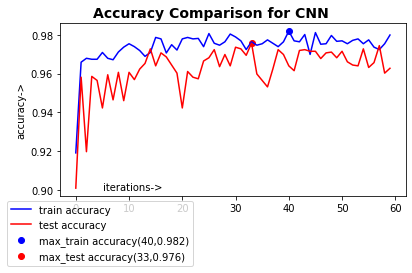

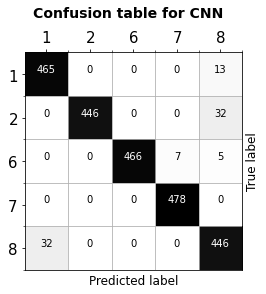

In [ ]:
train_acc1, test_acc1, targets1, pred1 = cnn1
print("Média de treino: ",np.mean(train_acc1))
print("Média de teste: ",np.mean(test_acc1))
print("Desvio padrão de treino: ",np.std(train_acc1))
print("Desvio padrão de teste: ",np.std(test_acc1))
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for CNN',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for CNN')

# Fault Set 2 : Using different set of faults to test the model

In [ ]:
target2 = [3, 4, 5, 9, 10, 11, 12]

train_data2, train_labels2 = gen_seq_data(target2, n_samples, is_train=True)
test_data2, test_labels2 = gen_seq_data(target2, n_samples, is_train=False)

scaler2 = preprocessing.StandardScaler().fit(train_data2)
train_data2 = scaler2.transform(train_data2)
test_data2 = scaler2.transform(test_data2)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(156, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


accuracy: 0.633


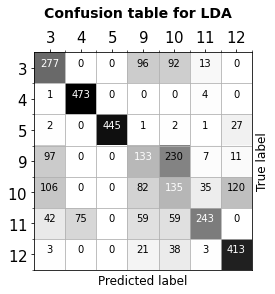

In [ ]:
lda2 = LDA_TE(n_components, train_data2, train_labels2, test_data2, test_labels2)
confusion_table2(test_labels2, lda2, 'Confusion table for LDA')

accuracy: 0.653


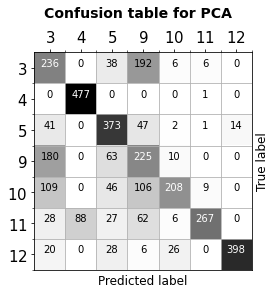

In [ ]:
pca2 = PCA_TE(n_components, train_data2, train_labels2, test_data2, test_labels2)
confusion_table2(test_labels2, pca2, 'Confusion table for PCA')

In [ ]:
ann2 = ANN_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:24:59.069387	epoch = 0	train accuracy: 0.582	test accuracy: 0.664
2021-06-14 01:24:59.559367	epoch = 1	train accuracy: 0.702	test accuracy: 0.710
2021-06-14 01:25:00.048053	epoch = 2	train accuracy: 0.718	test accuracy: 0.717
2021-06-14 01:25:00.546449	epoch = 3	train accuracy: 0.735	test accuracy: 0.730
2021-06-14 01:25:01.042132	epoch = 4	train accuracy: 0.752	test accuracy: 0.738
2021-06-14 01:25:01.528765	epoch = 5	train accuracy: 0.751	test accuracy: 0.752
2021-06-14 01:25:02.023588	epoch = 6	train accuracy: 0.757	test accuracy: 0.715
2021-06-14 01:25:02.519781	epoch = 7	train accuracy: 0.759	test accuracy: 0.745
2021-06-14 01:25:03.013343	epoch = 8	train accuracy: 0.765	test accuracy: 0.775
2021-06-14 01:25:03.500333	epoch = 9	train accuracy: 0.761	test accuracy: 0.751
2021-06-14 01:25:03.988726	epoch = 10	train accuracy: 0.762	test accuracy: 0.776
2021-06-14 01:25:04.482612	epoch = 11	train accuracy: 0.766	test accuracy: 0.780
2021-06-14 01:25:04.964106	epoch = 12	

In [ ]:
lstm2 = LSTM_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:25:28.509179	epoch = 0	train accuracy: 0.636	test accuracy: 0.676
2021-06-14 01:25:28.974571	epoch = 1	train accuracy: 0.755	test accuracy: 0.725
2021-06-14 01:25:29.429346	epoch = 2	train accuracy: 0.787	test accuracy: 0.741
2021-06-14 01:25:29.889351	epoch = 3	train accuracy: 0.786	test accuracy: 0.726
2021-06-14 01:25:30.342238	epoch = 4	train accuracy: 0.795	test accuracy: 0.734
2021-06-14 01:25:30.804063	epoch = 5	train accuracy: 0.802	test accuracy: 0.760
2021-06-14 01:25:31.260775	epoch = 6	train accuracy: 0.821	test accuracy: 0.776
2021-06-14 01:25:31.714303	epoch = 7	train accuracy: 0.829	test accuracy: 0.758
2021-06-14 01:25:32.174226	epoch = 8	train accuracy: 0.828	test accuracy: 0.765
2021-06-14 01:25:32.631641	epoch = 9	train accuracy: 0.833	test accuracy: 0.763
2021-06-14 01:25:33.091974	epoch = 10	train accuracy: 0.837	test accuracy: 0.795
2021-06-14 01:25:33.537198	epoch = 11	train accuracy: 0.841	test accuracy: 0.738
2021-06-14 01:25:34.000383	epoch = 12	

In [ ]:
lstmb2 = LSTMB_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:25:56.174187	epoch = 0	train accuracy: 0.657	test accuracy: 0.711
2021-06-14 01:25:56.687596	epoch = 1	train accuracy: 0.768	test accuracy: 0.736
2021-06-14 01:25:57.221072	epoch = 2	train accuracy: 0.787	test accuracy: 0.730
2021-06-14 01:25:57.742647	epoch = 3	train accuracy: 0.803	test accuracy: 0.750
2021-06-14 01:25:58.263980	epoch = 4	train accuracy: 0.817	test accuracy: 0.759
2021-06-14 01:25:58.788565	epoch = 5	train accuracy: 0.822	test accuracy: 0.784
2021-06-14 01:25:59.308059	epoch = 6	train accuracy: 0.839	test accuracy: 0.776
2021-06-14 01:25:59.855765	epoch = 7	train accuracy: 0.833	test accuracy: 0.749
2021-06-14 01:26:00.406333	epoch = 8	train accuracy: 0.846	test accuracy: 0.797
2021-06-14 01:26:00.936457	epoch = 9	train accuracy: 0.839	test accuracy: 0.792
2021-06-14 01:26:01.451572	epoch = 10	train accuracy: 0.850	test accuracy: 0.776
2021-06-14 01:26:01.975549	epoch = 11	train accuracy: 0.844	test accuracy: 0.782
2021-06-14 01:26:02.494983	epoch = 12	

In [ ]:
cnn2 = CNN_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

(5586, 1, 156)
(3346, 1, 156)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:26:27.674434	epoch = 0	train accuracy: 0.520	test accuracy: 0.637
2021-06-14 01:26:28.404203	epoch = 1	train accuracy: 0.633	test accuracy: 0.687
2021-06-14 01:26:29.149116	epoch = 2	train accuracy: 0.659	test accuracy: 0.676
2021-06-14 01:26:29.853196	epoch = 3	train accuracy: 0.668	test accuracy: 0.660
2021-06-14 01:26:30.594898	epoch = 4	train accuracy: 0.662	test accuracy: 0.698
2021-06-14 01:26:31.333171	epoch = 5	train accuracy: 0.672	test accuracy: 0.688
2021-06-14 01:26:32.061532	epoch = 6	train accuracy: 0.672	test accuracy: 0.680
2021-06-14 01:26:32.778415	epoch = 7	train accuracy: 0.680	test accuracy: 0.704
2021-06-14 01:26:33.549062	epoch = 8	train accuracy: 0.669	test accuracy: 0.683
2021-06-14 01:26:34.329638	epoch = 9	train accuracy: 0.678	test accuracy: 0.699
2021-06-14 01:26:35.070097	epoch = 10	train accuracy: 0.682	test accuracy: 0.671
2021-06-14 01:26:35.813517	epoch = 11	train accuracy: 0.682	test accuracy: 0.684
2021-06-14 01:26:36.545279	epoch = 12	

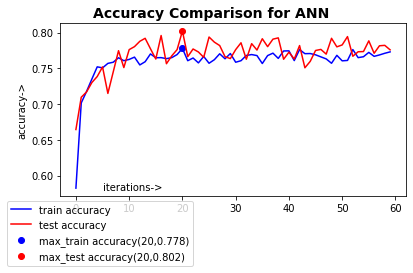

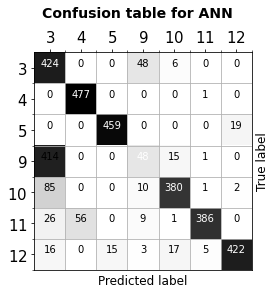

In [ ]:
train_acc2, test_acc2, targets2, pred2 = ann2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for ANN',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for ANN')

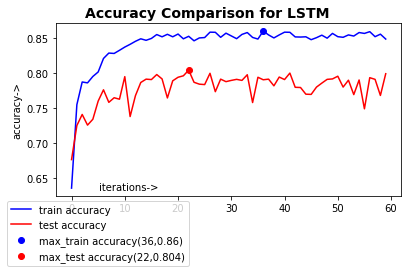

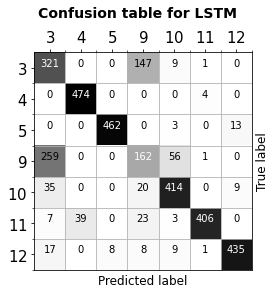

In [ ]:
train_acc2, test_acc2, targets2, pred2 = lstm2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for LSTM')

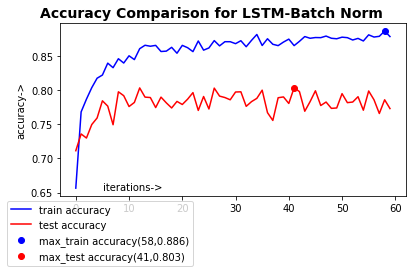

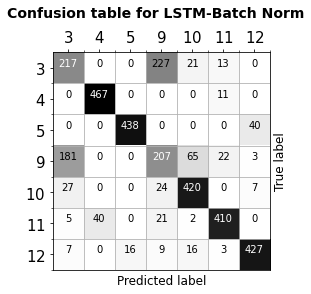

In [ ]:
train_acc2, test_acc2, targets2, pred2 = lstmb2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM-Batch Norm',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for LSTM-Batch Norm')

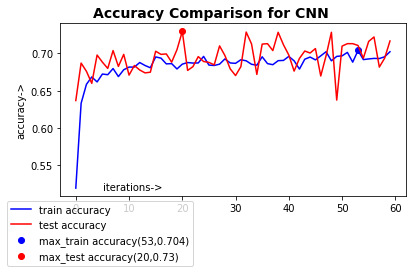

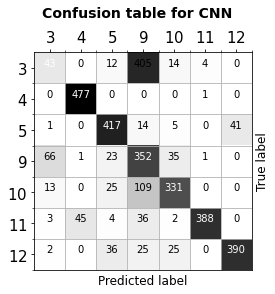

In [ ]:
train_acc2, test_acc2, targets2, pred2 = cnn2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for CNN',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for CNN')

# Target 3 : Using ALL of faults to test the model

In [ ]:
target3 = list(range(1, 22)) 

train_data3, train_labels3 = gen_seq_data(target3, n_samples, is_train=True)
test_data3, test_labels3 = gen_seq_data(target3, n_samples, is_train=False)

scaler3 = preprocessing.StandardScaler().fit(train_data3)
train_data3 = scaler3.transform(train_data3)
test_data3 = scaler3.transform(test_data3)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(156, 21 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


accuracy: 0.490


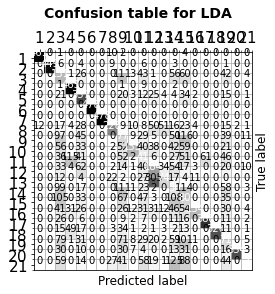

In [ ]:
lda3 = LDA_TE(n_components, train_data3, train_labels3, test_data3, test_labels3)
confusion_table3(test_labels3, lda3, 'Confusion table for LDA')

accuracy: 0.473


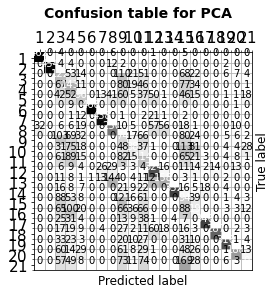

In [ ]:
pca3 = PCA_TE(n_components, train_data3, train_labels3, test_data3, test_labels3)
confusion_table3(test_labels3, pca3, 'Confusion table for PCA')

In [ ]:
ann3 = ANN_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:29:46.476643	epoch = 0	train accuracy: 0.459	test accuracy: 0.482
2021-06-14 01:29:47.945164	epoch = 1	train accuracy: 0.557	test accuracy: 0.526
2021-06-14 01:29:49.410313	epoch = 2	train accuracy: 0.583	test accuracy: 0.580
2021-06-14 01:29:50.861118	epoch = 3	train accuracy: 0.613	test accuracy: 0.552
2021-06-14 01:29:52.347455	epoch = 4	train accuracy: 0.628	test accuracy: 0.571
2021-06-14 01:29:53.841152	epoch = 5	train accuracy: 0.644	test accuracy: 0.615
2021-06-14 01:29:55.296768	epoch = 6	train accuracy: 0.641	test accuracy: 0.584
2021-06-14 01:29:56.761466	epoch = 7	train accuracy: 0.648	test accuracy: 0.608
2021-06-14 01:29:58.214573	epoch = 8	train accuracy: 0.652	test accuracy: 0.597
2021-06-14 01:29:59.682789	epoch = 9	train accuracy: 0.647	test accuracy: 0.607
2021-06-14 01:30:01.142605	epoch = 10	train accuracy: 0.652	test accuracy: 0.640
2021-06-14 01:30:02.608906	epoch = 11	train accuracy: 0.657	test accuracy: 0.592
2021-06-14 01:30:04.092216	epoch = 12	

In [ ]:
lstm3 = LSTM_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:31:14.770907	epoch = 0	train accuracy: 0.549	test accuracy: 0.563
2021-06-14 01:31:16.126591	epoch = 1	train accuracy: 0.687	test accuracy: 0.642
2021-06-14 01:31:17.510262	epoch = 2	train accuracy: 0.706	test accuracy: 0.627
2021-06-14 01:31:18.869511	epoch = 3	train accuracy: 0.716	test accuracy: 0.662
2021-06-14 01:31:20.239890	epoch = 4	train accuracy: 0.720	test accuracy: 0.648
2021-06-14 01:31:21.612772	epoch = 5	train accuracy: 0.721	test accuracy: 0.659
2021-06-14 01:31:22.968575	epoch = 6	train accuracy: 0.720	test accuracy: 0.663
2021-06-14 01:31:24.330498	epoch = 7	train accuracy: 0.722	test accuracy: 0.668
2021-06-14 01:31:25.705407	epoch = 8	train accuracy: 0.723	test accuracy: 0.649
2021-06-14 01:31:27.061283	epoch = 9	train accuracy: 0.721	test accuracy: 0.646
2021-06-14 01:31:28.421299	epoch = 10	train accuracy: 0.725	test accuracy: 0.648
2021-06-14 01:31:29.788158	epoch = 11	train accuracy: 0.724	test accuracy: 0.642
2021-06-14 01:31:31.178105	epoch = 12	

In [ ]:
lstmb3 = LSTMB_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:32:36.984960	epoch = 0	train accuracy: 0.609	test accuracy: 0.640
2021-06-14 01:32:38.646713	epoch = 1	train accuracy: 0.710	test accuracy: 0.638
2021-06-14 01:32:40.206946	epoch = 2	train accuracy: 0.721	test accuracy: 0.665
2021-06-14 01:32:41.764194	epoch = 3	train accuracy: 0.726	test accuracy: 0.640
2021-06-14 01:32:43.324267	epoch = 4	train accuracy: 0.731	test accuracy: 0.677
2021-06-14 01:32:44.884371	epoch = 5	train accuracy: 0.734	test accuracy: 0.659
2021-06-14 01:32:46.425601	epoch = 6	train accuracy: 0.736	test accuracy: 0.650
2021-06-14 01:32:47.995604	epoch = 7	train accuracy: 0.738	test accuracy: 0.637
2021-06-14 01:32:49.560040	epoch = 8	train accuracy: 0.739	test accuracy: 0.660
2021-06-14 01:32:51.110038	epoch = 9	train accuracy: 0.745	test accuracy: 0.684
2021-06-14 01:32:52.685709	epoch = 10	train accuracy: 0.743	test accuracy: 0.657
2021-06-14 01:32:54.242658	epoch = 11	train accuracy: 0.751	test accuracy: 0.682
2021-06-14 01:32:55.792473	epoch = 12	

In [ ]:
cnn3 = CNN_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

(16758, 1, 156)
(10038, 1, 156)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2021-06-14 01:34:11.725878	epoch = 0	train accuracy: 0.479	test accuracy: 0.471
2021-06-14 01:34:13.918309	epoch = 1	train accuracy: 0.524	test accuracy: 0.508
2021-06-14 01:34:16.162124	epoch = 2	train accuracy: 0.536	test accuracy: 0.503
2021-06-14 01:34:18.351688	epoch = 3	train accuracy: 0.537	test accuracy: 0.492
2021-06-14 01:34:20.522277	epoch = 4	train accuracy: 0.542	test accuracy: 0.504
2021-06-14 01:34:22.714112	epoch = 5	train accuracy: 0.543	test accuracy: 0.508
2021-06-14 01:34:24.866797	epoch = 6	train accuracy: 0.555	test accuracy: 0.518
2021-06-14 01:34:27.034143	epoch = 7	train accuracy: 0.554	test accuracy: 0.506
2021-06-14 01:34:29.220971	epoch = 8	train accuracy: 0.554	test accuracy: 0.517
2021-06-14 01:34:31.383017	epoch = 9	train accuracy: 0.550	test accuracy: 0.509
2021-06-14 01:34:33.532116	epoch = 10	train accuracy: 0.548	test accuracy: 0.499
2021-06-14 01:34:35.711877	epoch = 11	train accuracy: 0.549	test accuracy: 0.504
2021-06-14 01:34:37.886187	epoch = 12	

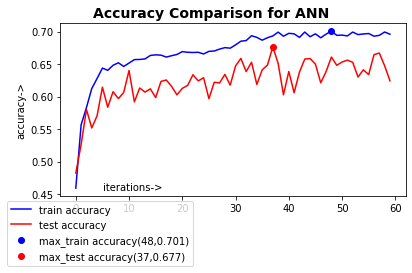

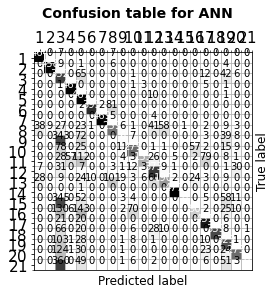

In [ ]:
train_acc3, test_acc3, targets3, pred3 = ann3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for ANN',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for ANN')

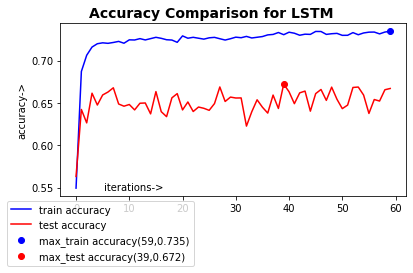

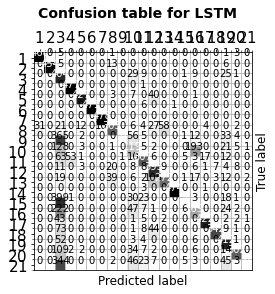

In [ ]:
train_acc3, test_acc3, targets3, pred3 = lstm3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for LSTM')

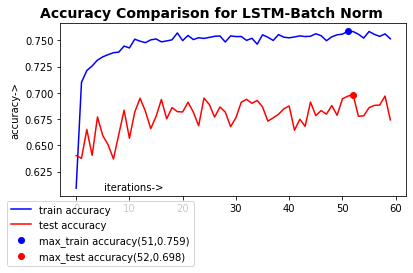

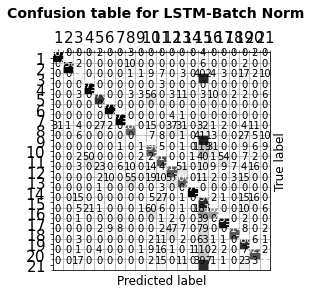

In [ ]:
train_acc3, test_acc3, targets3, pred3 = lstmb3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM-Batch Norm',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for LSTM-Batch Norm')

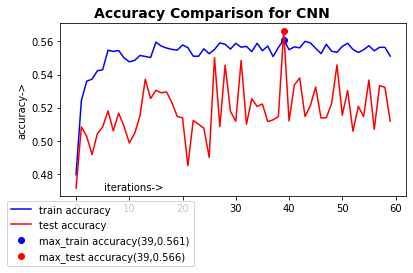

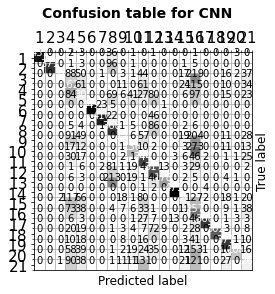

In [ ]:
train_acc3, test_acc3, targets3, pred3 = cnn3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for CNN',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for CNN')

# Comparison of Accuracies between ANN, LSTM and LSTM-BN

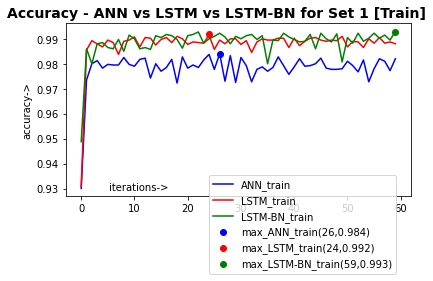

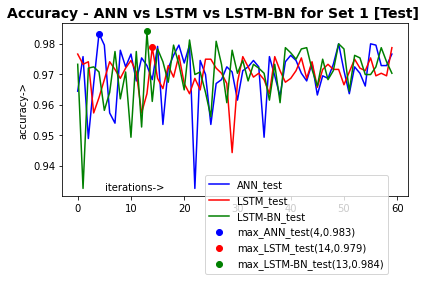

(0, 0, 0)

In [ ]:
train_acc1a, test_acc1a, targets1a, pred1a = ann1
train_acc1, test_acc1, targets1, pred1 = lstm1
train_acc1b, test_acc1b, targets1b, pred1b = lstmb1
plots((train_acc1a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 1 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc1, 'LSTM_train'), third=(train_acc1b, 'LSTM-BN_train'), show_min=True)
plots((test_acc1a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 1 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc1, 'LSTM_test'), third=(test_acc1b, 'LSTM-BN_test'), show_min=True)

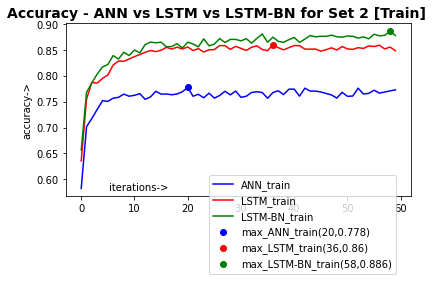

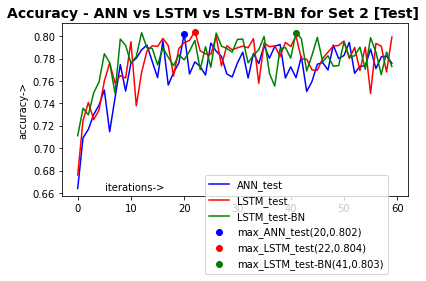

(0, 0, 0)

In [ ]:
train_acc2a, test_acc2a, targets2a, pred2a = ann2
train_acc2, test_acc2, targets2, pred2 = lstm2
train_acc2b, test_acc2b, targets2b, pred2b = lstmb2
plots((train_acc2a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 2 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc2, 'LSTM_train'), third=(train_acc2b, 'LSTM-BN_train'), show_min=True)
plots((test_acc2a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 2 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc2, 'LSTM_test'), third=(test_acc2b, 'LSTM_test-BN'), show_min=True)

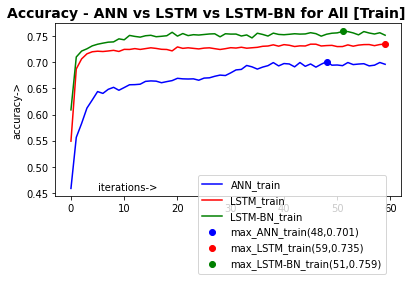

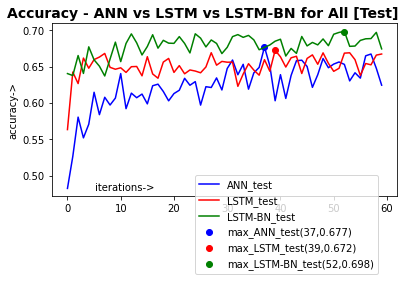

(0, 0, 0)

In [ ]:
train_acc3a, test_acc3a, targets3a, pred3a = ann3
train_acc3, test_acc3, targets3, pred3 = lstm3
train_acc3b, test_acc3b, targets3b, pred3b = lstmb3
plots((train_acc3a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for All [Train]',  num_iterations=60, x_label='iterations',second=(train_acc3, 'LSTM_train'), third=(train_acc3b, 'LSTM-BN_train'), show_min=True)
plots((test_acc3a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for All [Test]',  num_iterations=60, x_label='iterations',second=(test_acc3, 'LSTM_test'), third=(test_acc3b, 'LSTM-BN_test'), show_min=True)

# Comparison of Accuracies between ANN, CNN and LSTM-BN

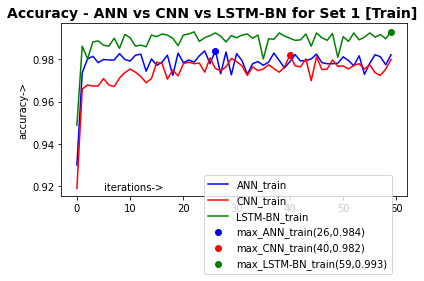

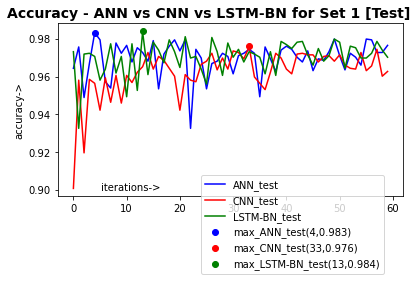

(0, 0, 0)

In [ ]:
train_acc1a, test_acc1a, targets1a, pred1a = ann1
train_acc1, test_acc1, targets1, pred1 = cnn1
train_acc1b, test_acc1b, targets1b, pred1b = lstmb1
plots((train_acc1a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 1 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc1, 'CNN_train'), third=(train_acc1b, 'LSTM-BN_train'), show_min=True)
plots((test_acc1a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 1 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc1, 'CNN_test'), third=(test_acc1b, 'LSTM-BN_test'), show_min=True)

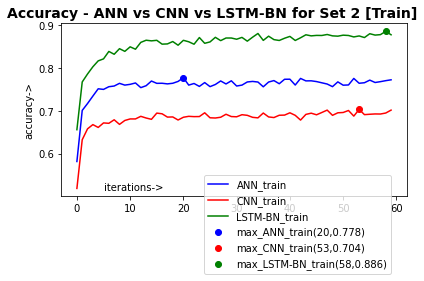

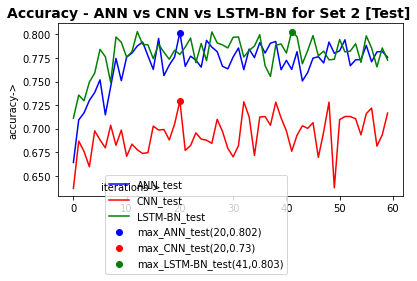

(0, 0, 0)

In [ ]:
train_acc2a, test_acc2a, targets2a, pred2a = ann2
train_acc2, test_acc2, targets2, pred2 = cnn2
train_acc2b, test_acc2b, targets2b, pred2b = lstmb2
plots((train_acc2a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 2 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc2, 'CNN_train'), third=(train_acc2b, 'LSTM-BN_train'), show_min=True)
plots((test_acc2a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 2 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc2, 'CNN_test'), third=(test_acc2b, 'LSTM-BN_test'), show_min=True)

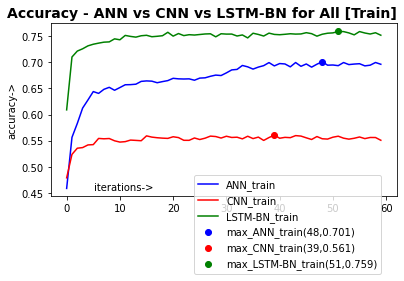

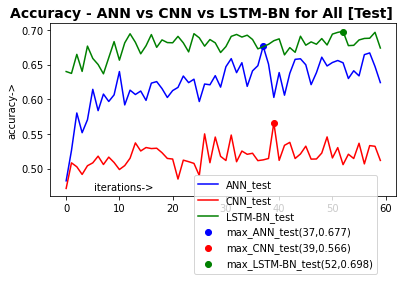

(0, 0, 0)

In [ ]:
train_acc3a, test_acc3a, targets3a, pred3a = ann3
train_acc3, test_acc3, targets3, pred3 = cnn3
train_acc3b, test_acc3b, targets3b, pred3b = lstmb3
plots((train_acc3a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for All [Train]',  num_iterations=60, x_label='iterations',second=(train_acc3, 'CNN_train'), third=(train_acc3b, 'LSTM-BN_train'), show_min=True)
plots((test_acc3a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for All [Test]',  num_iterations=60, x_label='iterations',second=(test_acc3, 'CNN_test'), third=(test_acc3b, 'LSTM-BN_test'), show_min=True)

# Comparison of Accuracies across Fault Sets

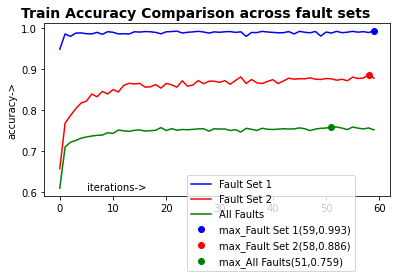

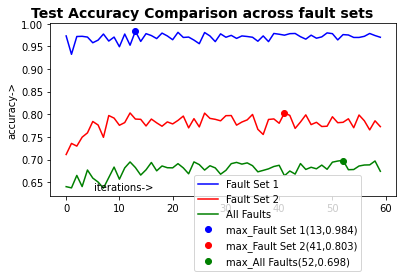

(0, 0, 0)

In [ ]:
train_acc1, test_acc1,_,_  = lstmb1
train_acc2, test_acc2,_,_ = lstmb2
train_acc3, test_acc3,_,_ = lstmb3
plots((train_acc1, 'Fault Set 1'), 'accuracy', 'Train Accuracy Comparison across fault sets',  num_iterations=60, x_label='iterations',second=(train_acc2, 'Fault Set 2'), third=(train_acc3, 'All Faults'), show_min=True)
plots((test_acc1, 'Fault Set 1'), 'accuracy', 'Test Accuracy Comparison across fault sets',  num_iterations=60, x_label='iterations',second=(test_acc2, 'Fault Set 2'), third=(test_acc3, 'All Faults'), show_min=True)